<a href="https://www.kaggle.com/code/aishitha/gen-stylegan3?scriptVersionId=263106307" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!git clone https://github.com/NVlabs/stylegan3.git
%cd stylegan3

Cloning into 'stylegan3'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 212 (delta 99), reused 90 (delta 90), pack-reused 49 (from 1)
Receiving objects: 100% (212/212), 4.16 MiB | 22.08 MiB/s, done.
Resolving deltas: 100% (108/108), done.
/kaggle/working/stylegan3


In [2]:
!pip install ninja imageio-ffmpeg
!pip install torch torchvision --extra-index-url https://download.pytorch.org/whl/cu113


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Unins

In [3]:
!python gen_images.py --help


Usage: gen_images.py [OPTIONS]

  Generate images using pretrained network pickle.

  Examples:

  # Generate an image using pre-trained AFHQv2 model ("Ours" in Figure 1, left).
  python gen_images.py --outdir=out --trunc=1 --seeds=2 \
      --network=https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-afhqv2-512x512.pkl

  # Generate uncurated images with truncation using the MetFaces-U dataset
  python gen_images.py --outdir=out --trunc=0.7 --seeds=600-605 \
      --network=https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-t-metfacesu-1024x1024.pkl

Options:
  --network TEXT                  Network pickle filename  [required]
  --seeds PARSE_RANGE             List of random seeds (e.g., '0,1,4-6')
                                  [required]
  --trunc FLOAT                   Truncation psi  [default: 1]
  --class INTEGER                 Class label (unconditional if not specified)
  --noise-mode [const|r

In [4]:
!python gen_images.py \
    --network=https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-afhqv2-512x512.pkl \
    --seeds=0-3 \
    --outdir=out


Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-afhqv2-512x512.pkl"...
Generating image for seed 0 (0/4) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Generating image for seed 1 (1/4) ...
Generating image for seed 2 (2/4) ...
Generating image for seed 3 (3/4) ...


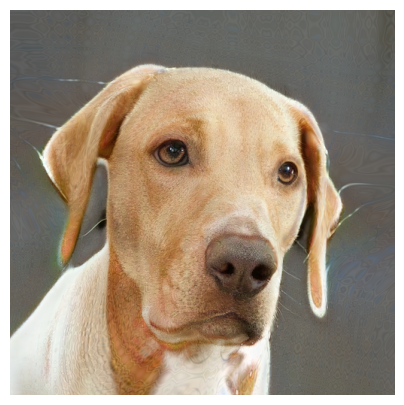

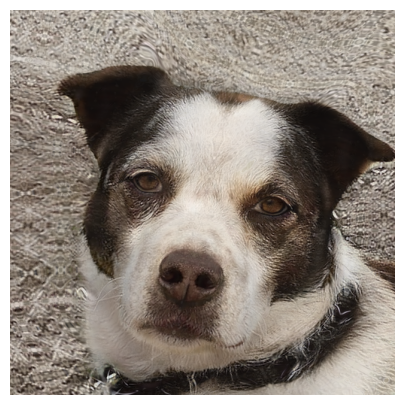

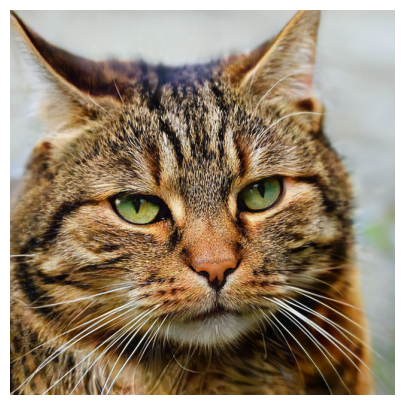

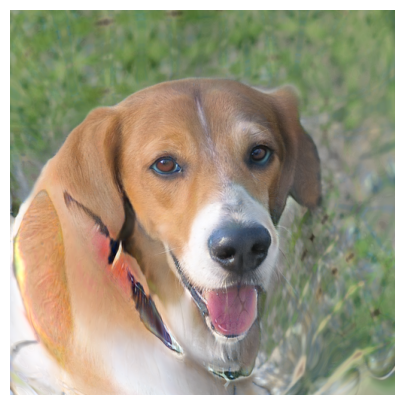

In [5]:
import matplotlib.pyplot as plt
import PIL.Image
import glob

# Get generated images
imgs = sorted(glob.glob("out/*.png"))

# Display them
for img_path in imgs:
    img = PIL.Image.open(img_path)
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis("off")
    plt.show()


In [6]:
!python gen_images.py \
    --network=https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-afhqv2-512x512.pkl \
    --seeds=10-20 \
    --outdir=out_more


Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-afhqv2-512x512.pkl"...
Generating image for seed 10 (0/11) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Generating image for seed 11 (1/11) ...
Generating image for seed 12 (2/11) ...
Generating image for seed 13 (3/11) ...
Generating image for seed 14 (4/11) ...
Generating ima

In [7]:
#ffhq model
!python gen_images.py \
    --network=https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl \
    --seeds=0-5 \
    --outdir=out_faces


Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
Generating image for seed 0 (0/6) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Generating image for seed 1 (1/6) ...
Generating image for seed 2 (2/6) ...
Generating image for seed 3 (3/6) ...
Generating image for seed 4 (4/6) ...
Generating image for see

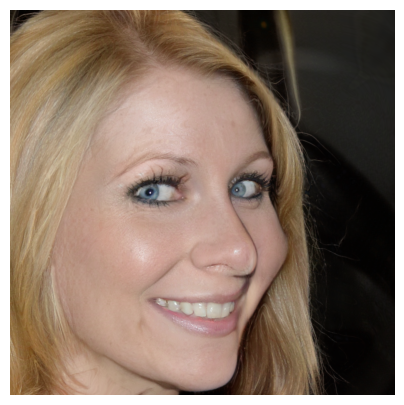

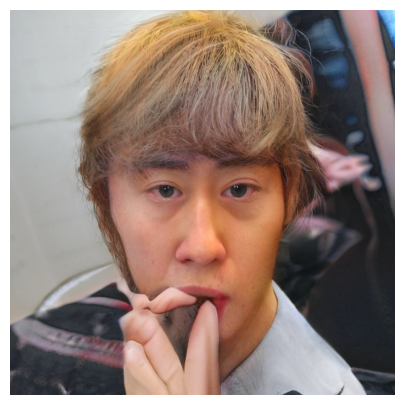

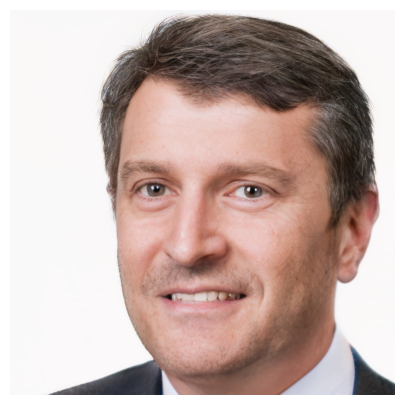

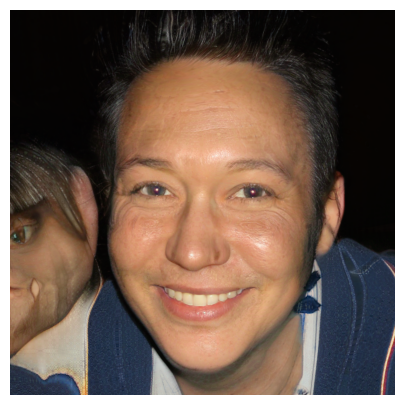

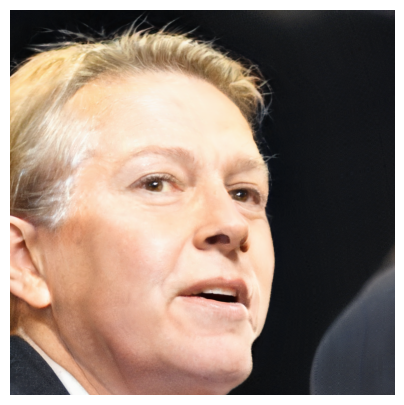

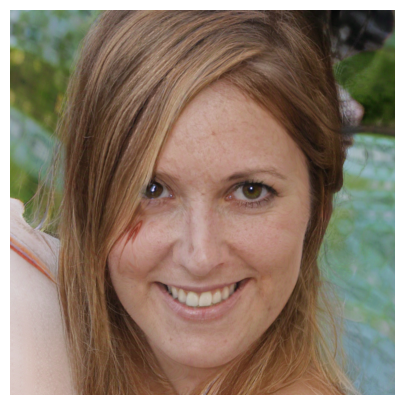

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

# Get all PNG images from the new folder
images = sorted(glob.glob("out_faces/*.png"))

# Check if we found images
if not images:
    print("No images found in out_faces/! Check folder path.")
else:
    # Display each image one by one
    for img_path in images:
        img = Image.open(img_path)
        plt.figure(figsize=(5,5))
        plt.imshow(img)
        plt.axis("off")
        plt.show()
